# 6.6 Sourcing and Analyzing Time Series Data Task

## Import libraries and dataframe

In [4]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear

In [6]:
# Import data

path = r'C:\Users\lefev\Documents\Data Analytics Course\Achievement 6'

In [8]:
df = pd.read_csv(os.path.join(path, 'Data', 'combined_happiness_data.csv'), index_col=False)

## Clean and Wrangle data 

In [10]:
# Drop the 1 missing value 

df_clean = df.dropna()

In [12]:
# Rename 

df = df_clean

In [17]:
# Check rows

df.head()

Happiness Rank      Country  Score  GDP per capita  Social support  \
0             1.0  Switzerland  7.587         1.39651         1.34951   
1             2.0      Iceland  7.561         1.30232         1.40223   
2             3.0      Denmark  7.527         1.32548         1.36058   
3             4.0       Norway  7.522         1.45900         1.33095   
4             5.0       Canada  7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                  0.94143                       0.66557     0.41978   
1                  0.94784                       0.62877     0.14145   
2                  0.87464                       0.64938     0.48357   
3                  0.88521                       0.66973     0.36503   
4                  0.90563                       0.63297     0.32957   

   Perceptions of corruption  Year Happiness Level  
0                    0.29678  2015            High  
1                    0.43630  2015            High  
2                    0.34139  2015            High  
3                    0.34699  2015            High  
4                    0.45811  2015            High

In [19]:
df.tail()

Happiness Rank                   Country  Score  GDP per capita  \
777           152.0                    Rwanda  3.334           0.359   
778           153.0                  Tanzania  3.231           0.476   
779           154.0               Afghanistan  3.203           0.350   
780           155.0  Central African Republic  3.083           0.026   
781           156.0               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
777           0.711                    0.614                         0.555   
778           0.885                    0.499                         0.417   
779           0.517                    0.361                         0.000   
780           0.000                    0.105                         0.225   
781           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  Year Happiness Level  
777       0.217                      0.411  2019             Low  
778       0.276                      0.147  2019             Low  
779       0.158                      0.025  2019             Low  
780       0.235                      0.035  2019             Low  
781       0.202                      0.091  2019             Low

## Will not create a subset, as the 5 years (2015, 2016, 2017, 2018, 2019) is already somewhat limited

## Create a line chart

In [23]:
from datetime import datetime

# Convert Year to datetime (assuming Year is in full year format like 2015, 2016, etc)
df['datetime'] = pd.to_datetime(df['Year'], format='%Y')

# Set the datetime as the index
df = df.set_index('datetime')

# Drop the original Year column since it's now the index
df.drop(['Year'], axis=1, inplace=True)

# View the result
df.head()

Happiness Rank      Country  Score  GDP per capita  \
datetime                                                         
2015-01-01             1.0  Switzerland  7.587         1.39651   
2015-01-01             2.0      Iceland  7.561         1.30232   
2015-01-01             3.0      Denmark  7.527         1.32548   
2015-01-01             4.0       Norway  7.522         1.45900   
2015-01-01             5.0       Canada  7.427         1.32629   

            Social support  Healthy life expectancy  \
datetime                                              
2015-01-01         1.34951                  0.94143   
2015-01-01         1.40223                  0.94784   
2015-01-01         1.36058                  0.87464   
2015-01-01         1.33095                  0.88521   
2015-01-01         1.32261                  0.90563   

            Freedom to make life choices  Generosity  \
datetime                                               
2015-01-01                       0.66557     0.41978   
2015-01-01                       0.62877     0.14145   
2015-01-01                       0.64938     0.48357   
2015-01-01                       0.66973     0.36503   
2015-01-01                       0.63297     0.32957   

            Perceptions of corruption Happiness Level  
datetime                                               
2015-01-01                    0.29678            High  
2015-01-01                    0.43630            High  
2015-01-01                    0.34139            High  
2015-01-01                    0.34699            High  
2015-01-01                    0.45811            High

In [25]:
# Plot the data using matplotlib showing Happiness Score over Time

plt.figure(figsize=(15,5), dpi=100)

# Create the line plot using Score column
plt.plot(df.index, df['Score'])

# Customize the plot
plt.title('Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)

# Show the plot
plt.show()

In [27]:
# Try to correct how data is being plotted 

# First look at the data

print("First few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())

First few rows:
            Happiness Rank      Country  Score  GDP per capita  \
datetime                                                         
2015-01-01             1.0  Switzerland  7.587         1.39651   
2015-01-01             2.0      Iceland  7.561         1.30232   
2015-01-01             3.0      Denmark  7.527         1.32548   
2015-01-01             4.0       Norway  7.522         1.45900   
2015-01-01             5.0       Canada  7.427         1.32629   

            Social support  Healthy life expectancy  \
datetime                                              
2015-01-01         1.34951                  0.94143   
2015-01-01         1.40223                  0.94784   
2015-01-01         1.36058                  0.87464   
2015-01-01         1.33095                  0.88521   
2015-01-01         1.32261                  0.90563   

            Freedom to make life choices  Generosity  \
datetime                                               
2015-01-01             

## Realizing that it the data is plotting all countries. Best to find the average per year and plot that score. 

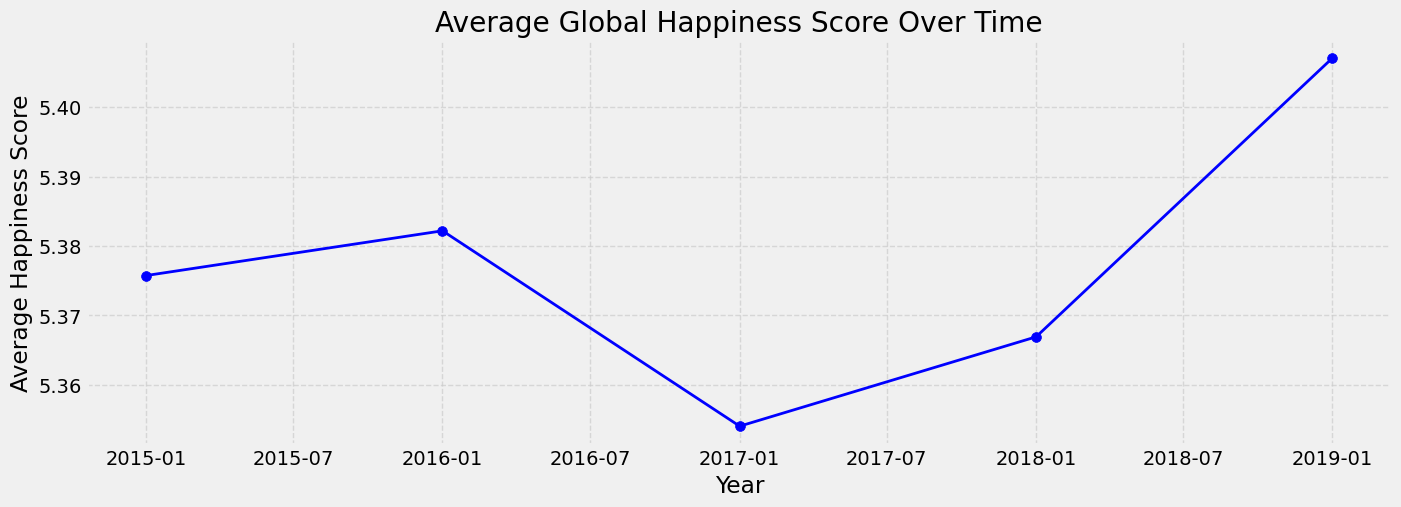


Yearly averages:
datetime
2015-01-01    5.375734
2016-01-01    5.382185
2017-01-01    5.354019
2018-01-01    5.366897
2019-01-01    5.407096
Name: Score, dtype: float64


In [32]:
# Create figure
plt.figure(figsize=(15,5), dpi=100)

# Calculate and plot average happiness score per year
yearly_average = df.groupby(df.index)['Score'].mean()
plt.plot(yearly_average.index, yearly_average.values, '-', color='blue', linewidth=2)

# Customize the plot
plt.title('Average Global Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)

# Add a light grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add points at each year's average
plt.scatter(yearly_average.index, yearly_average.values, color='blue', s=50)

# Display the plot
plt.show()

# Print the actual values
print("\nYearly averages:")
print(yearly_average)

## Time-series analysis: decomposition 

In [37]:
# First import required libraries
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt

# Make sure we have a proper time series (using the yearly_average we created earlier)
ts_data = yearly_average

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(ts_data, model='additive', period=1)  # period=1 since we have yearly data

# Set the figure size for plots
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

## This decomposition suggests that global happiness scores have been relatively stable over this period, with a slight dip around 2017 followed by a recovery. The lack of seasonality and small residuals indicate that changes in global happiness are gradual and fairly predictable.

## Conduct a Dickey-Fuller test to check for stationarity

In [41]:
# Run dickey fuller test

from statsmodels.tsa.stattools import adfuller  # Import the adfuller function

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test using the function on the average happiness scores
# We'll use the yearly_average series we created earlier
dickey_fuller(yearly_average)

Dickey-Fuller Stationarity test:
Test Statistic                -1.089588
p-value                        0.719206
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


## The data appears to be non-stationary because the p-value (0.719) is much larger than 0.05. Also the test statistic (-1.089) is less negative than all critical values. I would need the test statistic to be more negative than the critical values for stationarity

## This means the happiness data's statistical properties (mean, variance) are not constant over time.

## Perform a differencing to make data stationary

First few values of differenced data:
datetime
2016-01-01    0.006451
2017-01-01   -0.028165
2018-01-01    0.012877
2019-01-01    0.040199
Name: Score, dtype: float64

Dickey-Fuller test on differenced data:
Dickey-Fuller Stationarity test:
Test Statistic                 -0.611106
p-value                         0.868453
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


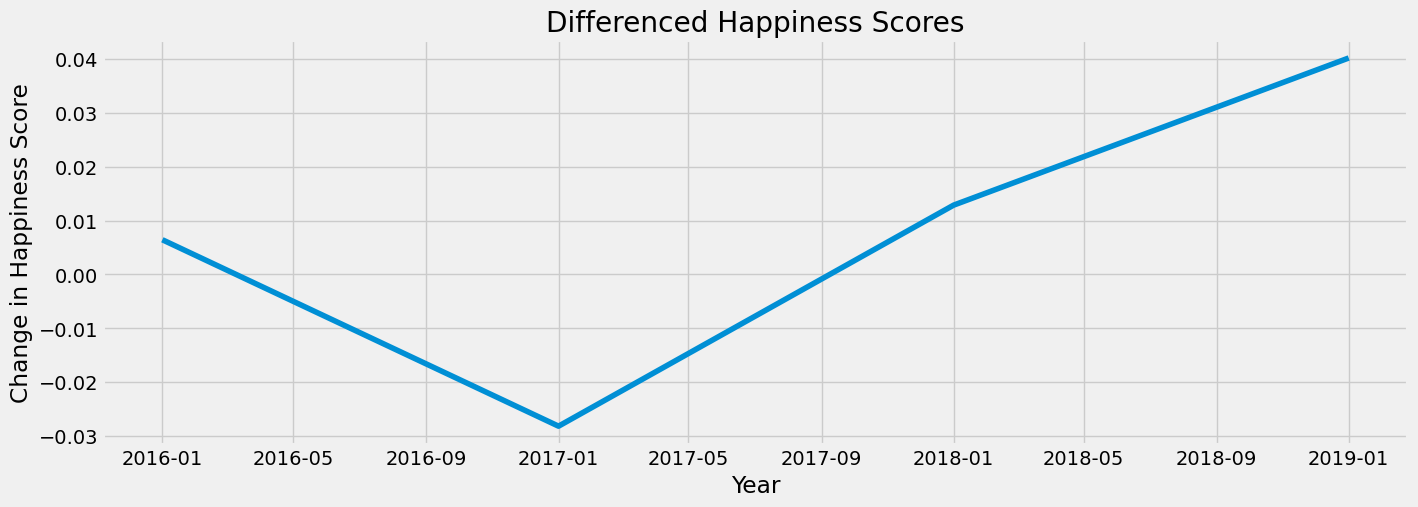

In [47]:
# Create differenced data
data_diff = yearly_average - yearly_average.shift(1)  # First difference

# Remove NA values that result from differencing
data_diff = data_diff.dropna()

# Look at the first few values of differenced data
print("First few values of differenced data:")
print(data_diff.head())

# Let's run the Dickey-Fuller test again on the differenced data
print("\nDickey-Fuller test on differenced data:")
dickey_fuller(data_diff)

# Optionally, let's visualize the differenced data
plt.figure(figsize=(15,5))
plt.plot(data_diff.index, data_diff.values)
plt.title('Differenced Happiness Scores')
plt.xlabel('Year')
plt.ylabel('Change in Happiness Score')
plt.grid(True)
plt.show()

In [49]:
# Try again to difference

# Apply second difference
data_diff2 = data_diff - data_diff.shift(1)
data_diff2 = data_diff2.dropna()

# Test again
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:


ValueError: sample size is too short to use selected regression component

## Unfortunately the dataset is too small for another differencing

## Check data’s autocorrelations

Number of observations: 5


<Figure size 1200x400 with 0 Axes>

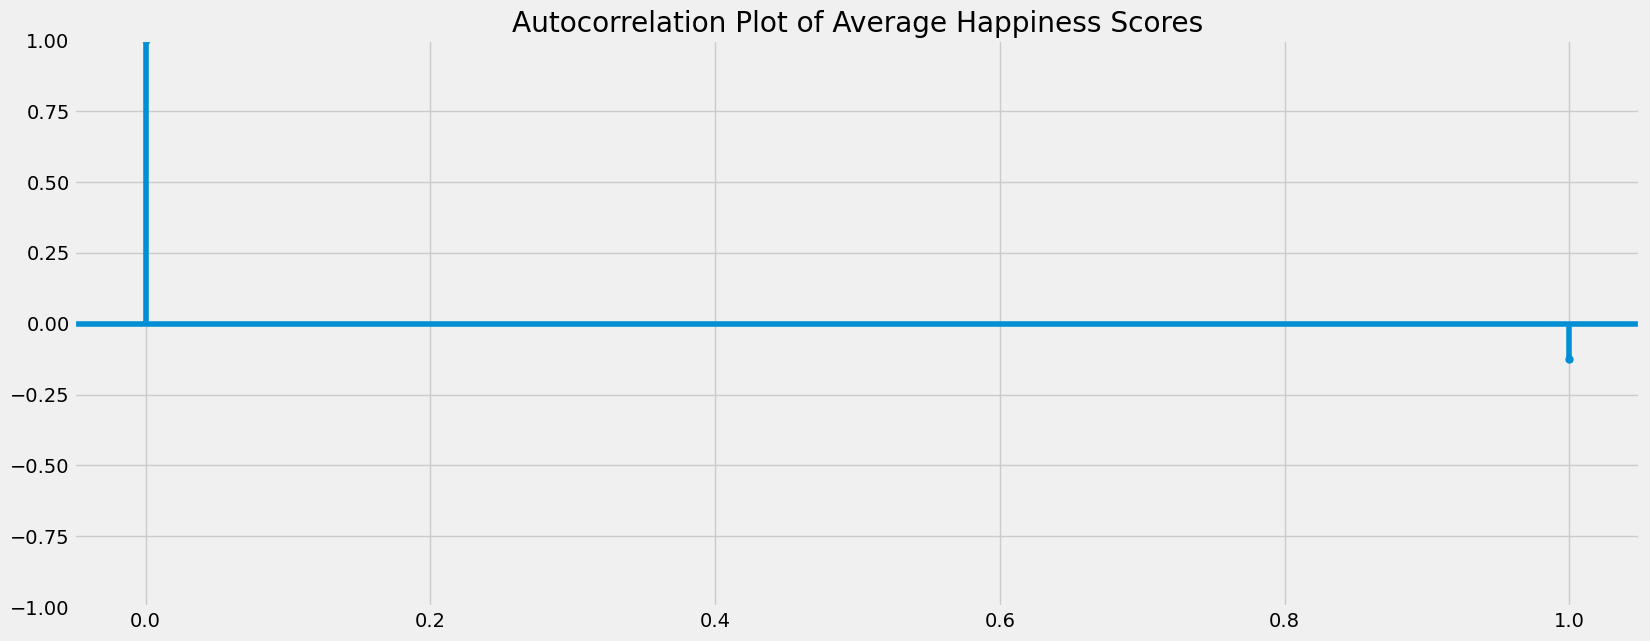

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First, let's see how many observations we have
print("Number of observations:", len(yearly_average))

# Create figure for ACF
plt.figure(figsize=(12,4))
plot_acf(yearly_average, lags=1)  # reducing lags to 1 or 2 based on data size
plt.title('Autocorrelation Plot of Average Happiness Scores')
plt.show()

## This seems too small a dataset to make strong statistical inferences about time-series patterns.